In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-data-analysis/UberDataset.csv


### Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Reading Data


In [3]:
data=pd.read_csv("/kaggle/input/uber-data-analysis/UberDataset.csv")


In [4]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
data.shape

(1156, 7)

In [6]:
data.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [7]:
data.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


### Check for null values

In [10]:
data.isna().values.any()

True

In [11]:
data.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

### Removing null values

In [12]:
columns_to_drop=data.columns.drop('PURPOSE')
data.dropna(subset=columns_to_drop,inplace=True)


### Replacing Wrong Values

In [13]:
data['START'] = data['START'].replace("Kar?chi", "Karachi")
data['STOP'] = data['STOP'].replace("Kar?chi", "Karachi")

### Converting dates to datetime datatype

In [14]:
data["START_DATE"]=pd.to_datetime(data["START_DATE"])
data["END_DATE"]=pd.to_datetime(data["END_DATE"])

### Analysis

In [15]:
print("Maximum Miles for a ride:",data["MILES"].max(),"miles")
print("Minimum Miles for a ride:",data["MILES"].min(),"miles")
print(f"Average Miles for a ride: {data['MILES'].mean():.3} miles")

Maximum Miles for a ride: 310.3 miles
Minimum Miles for a ride: 0.5 miles
Average Miles for a ride: 10.6 miles


In [16]:
print("Top Start Station:",data["START"].mode()[0])
print("Top Stop Station:",data["STOP"].mode()[0])

Top Start Station: Cary
Top Stop Station: Cary


In [17]:
data["START"].value_counts()[:10]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Karachi              31
Raleigh              28
Westpark Place       17
Name: START, dtype: int64

In [18]:
columns_to_check = ['CATEGORY' , 'PURPOSE']

for column in columns_to_check:
    distinct_values = data[column].unique()
    print(f"Distinct values in '{column}':")
    print(distinct_values)
    print()

Distinct values in 'CATEGORY':
['Business' 'Personal']

Distinct values in 'PURPOSE':
['Meal/Entertain' nan 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']



### Trips by Category

In [19]:
cat=data["CATEGORY"].value_counts()
fig=px.pie(labels=cat.index,values=cat.values,title="Category",names=cat.index,color_discrete_sequence=px.colors.sequential.Sunsetdark)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


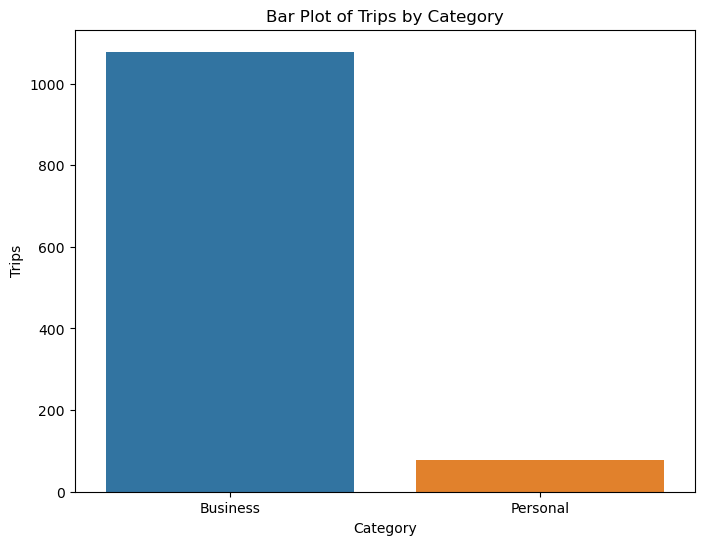

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x=cat.index, y=cat.values)
plt.xlabel("Category")
plt.ylabel("Trips")
plt.title("Bar Plot of Trips by Category")
plt.show()

### Trips by Purpose

In [21]:
pur=data["PURPOSE"].value_counts()
fig=px.pie(labels=pur.index,values=pur.values,title="Purpose",names=pur.index,color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



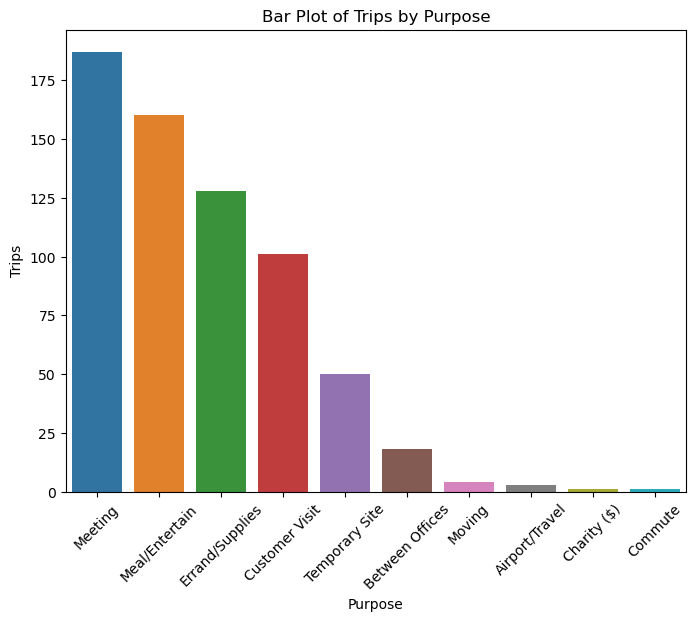

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x=pur.index, y=pur.values)
plt.xlabel("Purpose")
plt.ylabel("Trips")
plt.xticks(rotation=45)
plt.title("Bar Plot of Trips by Purpose")
plt.show()

### Average Miles by Purpose


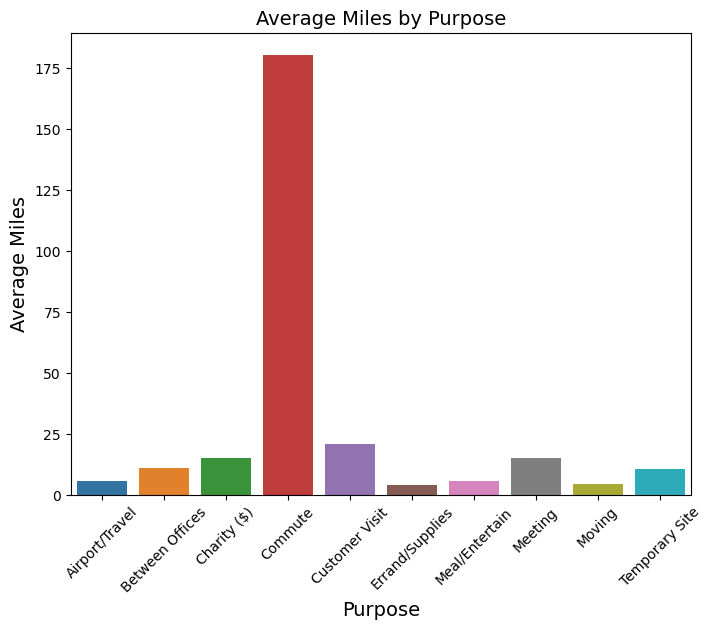

In [23]:
miles_pur=data.groupby("PURPOSE",as_index=False)["MILES"].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x="PURPOSE", y="MILES", data=miles_pur)
plt.title("Average Miles by Purpose", fontsize=14)
plt.xlabel("Purpose", fontsize=14)
plt.ylabel("Average Miles", fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Average Miles by Category

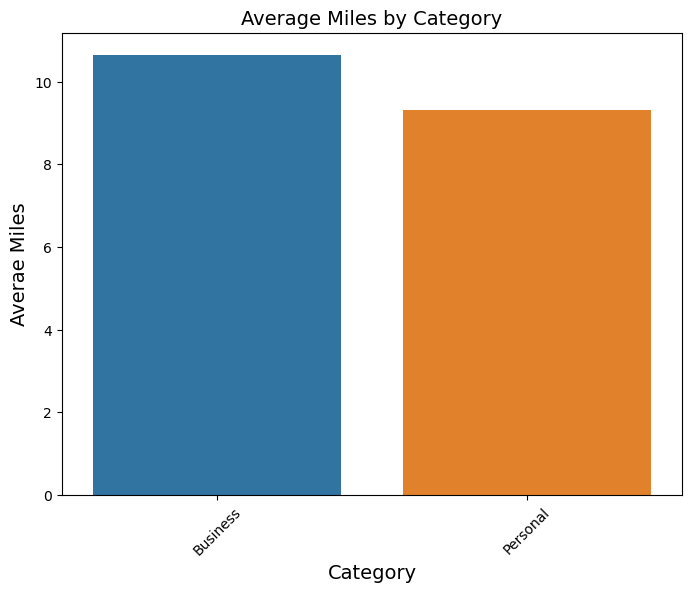

In [24]:
miles_cat=data.groupby("CATEGORY",as_index=False)["MILES"].mean()
plt.figure(figsize=(8,6))
sns.barplot(x=miles_cat["CATEGORY"],y=miles_cat["MILES"])
plt.title("Average Miles by Category",fontsize=14)
plt.xlabel("Category",fontsize=14)
plt.ylabel("Averae Miles",fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Station Performance

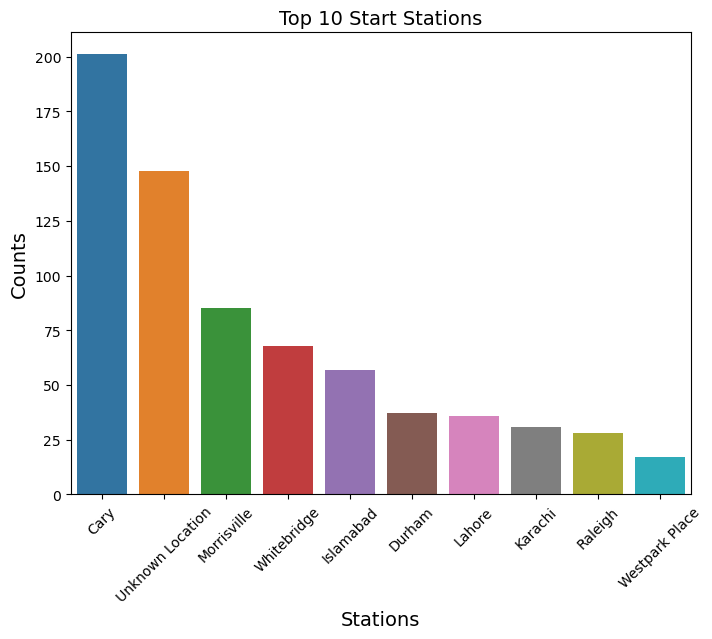

In [25]:
top_start_stations=data["START"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=top_start_stations.index[:10], y=top_start_stations.values[:10])
plt.title("Top 10 Start Stations", fontsize=14)
plt.xlabel("Stations", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.xticks(rotation=45)
plt.show()

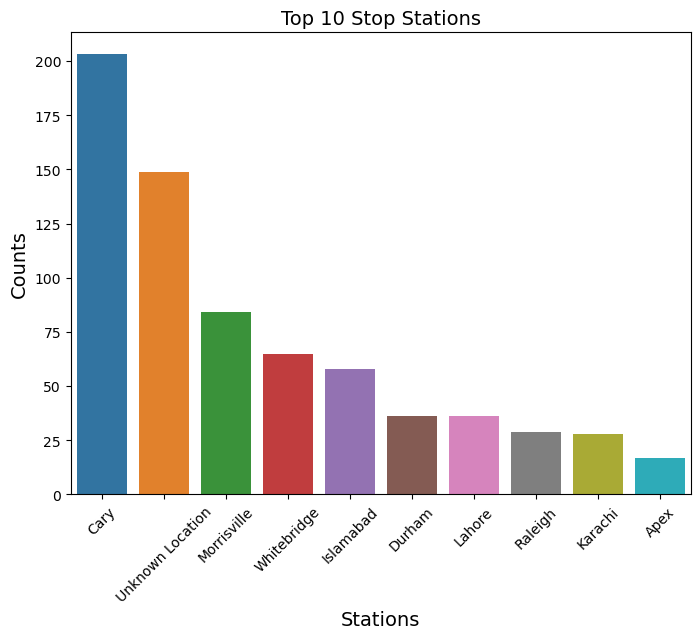

In [26]:
top_stop_stations=data["STOP"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=top_stop_stations.index[:10], y=top_stop_stations.values[:10])
plt.title("Top 10 Stop Stations", fontsize=14)
plt.xlabel("Stations", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.xticks(rotation=45)
plt.show()

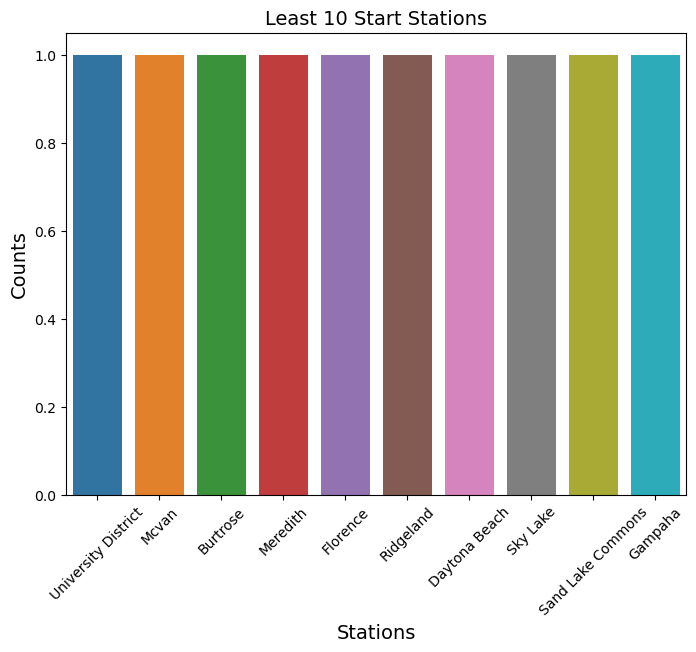

In [27]:
top_start_stations=data["START"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=top_start_stations.index[-10:], y=top_start_stations.values[-10:])
plt.title("Least 10 Start Stations", fontsize=14)
plt.xlabel("Stations", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.xticks(rotation=45)
plt.show()

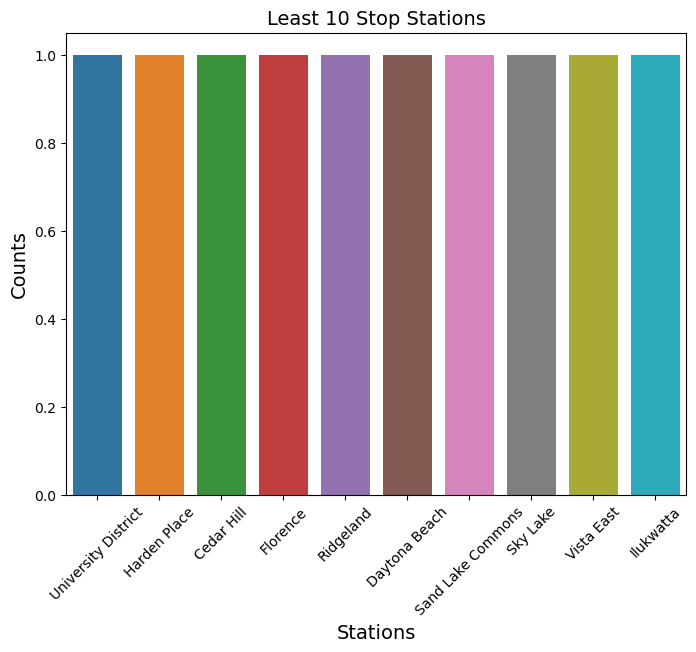

In [28]:
top_stop_stations=data["STOP"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=top_stop_stations.index[-10:], y=top_stop_stations.values[-10:])
plt.title("Least 10 Stop Stations", fontsize=14)
plt.xlabel("Stations", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Ride Duration

In [29]:
data['ride_duration'] = data['END_DATE'] - data['START_DATE']
min_duration = data['ride_duration'].min()
max_duration = data['ride_duration'].max()
average_duration = data['ride_duration'].mean()

print("Minimum ride duration:", min_duration)
print("Maximum ride duration:", max_duration)
print("Average ride duration:", average_duration)

Minimum ride duration: 0 days 00:00:00
Maximum ride duration: 0 days 05:36:00
Average ride duration: 0 days 00:23:14.597402597


Text(0.5, 1.0, 'Distribution of Uber Ride Durations')

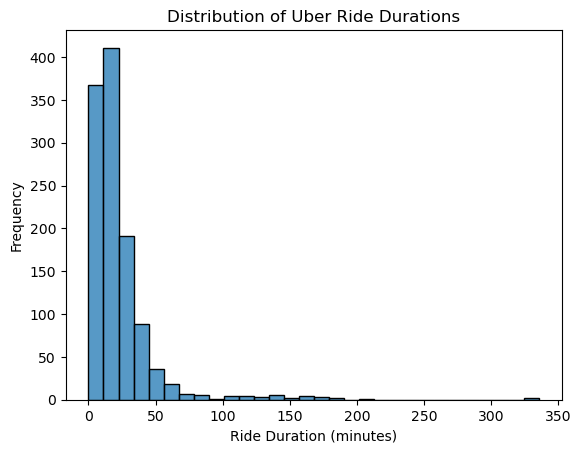

In [30]:
sns.histplot(data['ride_duration'].dt.total_seconds() / 60, bins=30) 
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Uber Ride Durations')
